# MAZE SOLVER I.A.
## David Enrique Molina Rodríguez y Christian Camilo Pabón Useche
### Ciencias de la computación 

[Poject's Link](https://github.com/ccpabonu/MazeSolver)


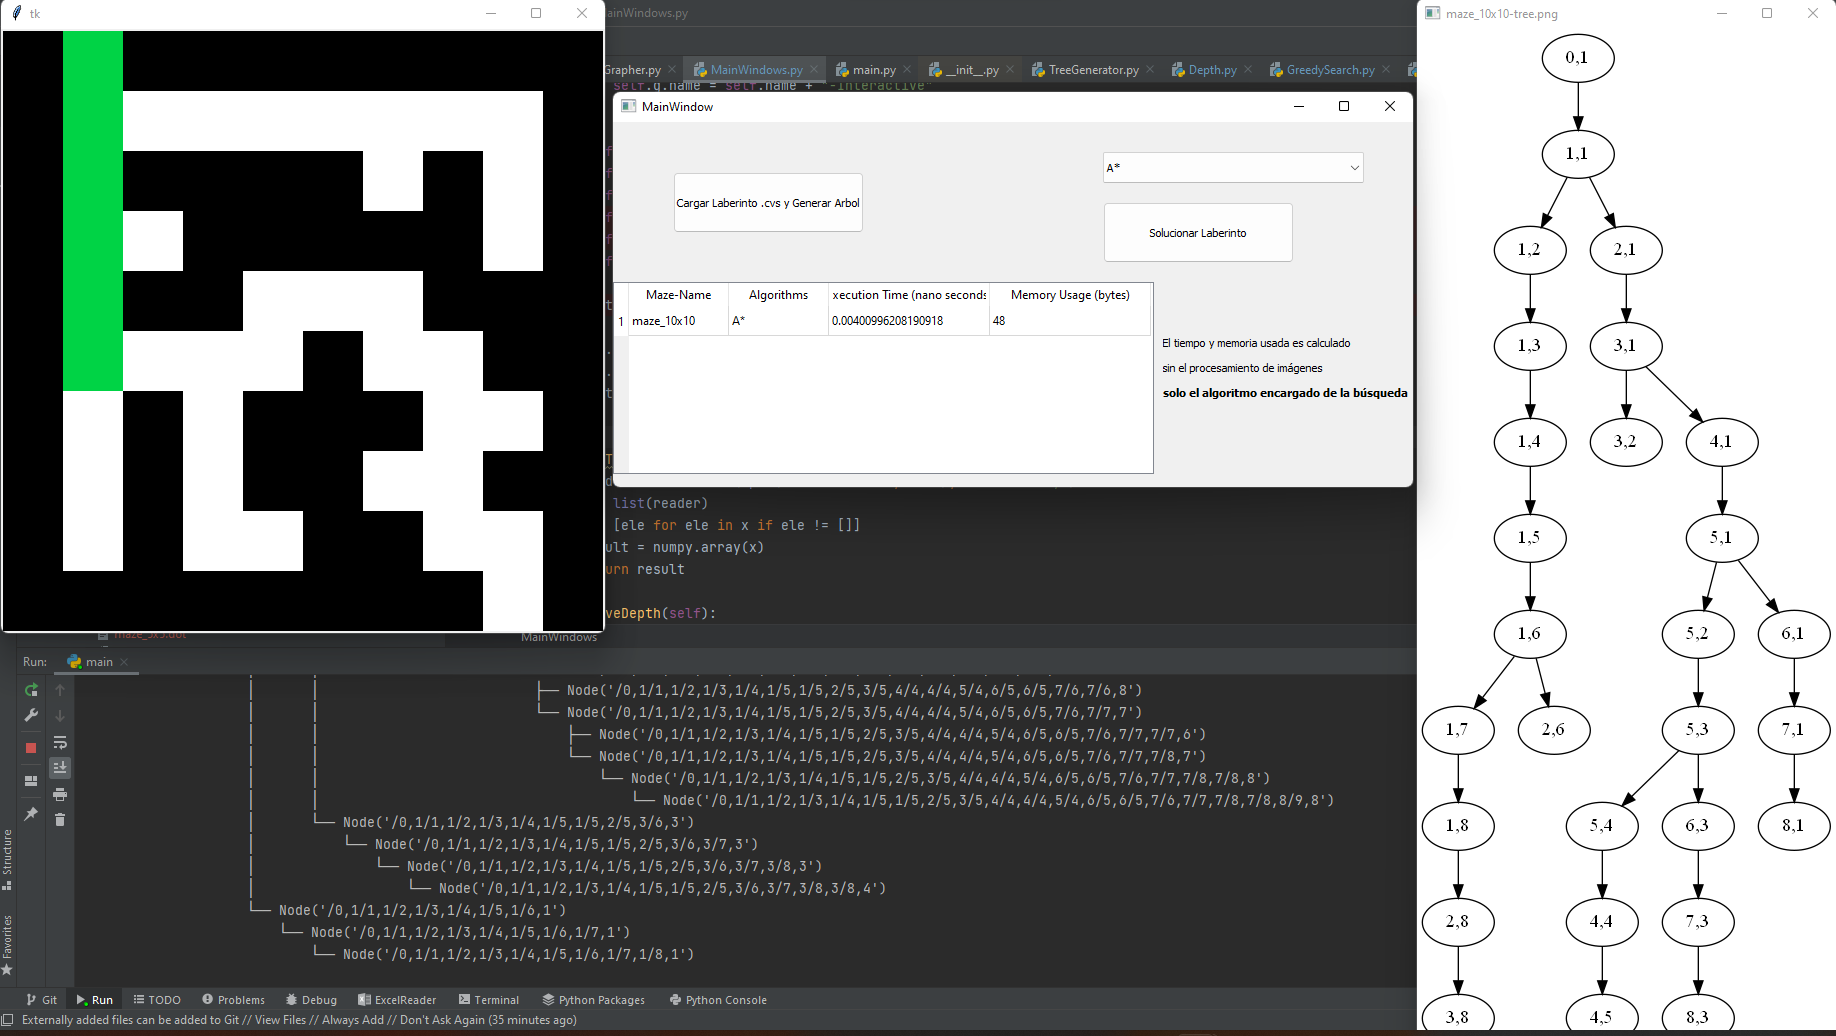

## Libraries

In [ ]:
!pip install PyQt5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.4 MB 5.0 MB/s 
     |████████████████████████████████| 344 kB 56.2 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 


In [ ]:
!pip install UI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install anytree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 532 kB/s 


In [ ]:
import sys
import numpy as np
from PyQt5.QtWidgets import QApplication
# from UI.MainWindows import MainWindows

# Data Structures:

## Nodes

In [ ]:
class Node_S():
    def __init__(self,data,next=None):
        self.data = data
        self.next = next

## Stack

In [ ]:
class Stack: #LIFO
    def __init__(self):
        # Init stack
        self.top = None
        self.size = 0
    def push(self, data):
        # Push or insert nodes to stack
        node = Node_S(data, self.top)
        if self.top:
            node.next = self.top
            self.top = node
        else:
            self.top = node
        self.size += 1
    def pop(self):
        # Pop or delete nodes to stack
        if self.top:
            data = self.top.data
            self.size -= 1
            if self.top.next:
                self.top = self.top.next
            else:
                self.top = None
            return data
        else:
            return False
    def peek(self):
        # Retorn the head node
        return self.top.data if self.top else False
    def clear(self):
        # Clear all stack
        while self.top:
            self.pop()
    def search_element(self, data):
        if self.top:
            current = self.top
            while current:
                if current.data == data:
                    return (f'Elemet {data} founded')
                current = current.next
            return (f'Elemet {data} not founded')

## Priority Queue

In [ ]:
class PriorityQueueMin(object):
    def __init__(self):
        self.queue = []
 
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
 
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0
 
    # for inserting an element in the queue
    def insert(self, data):
        self.queue.append(data)
 
    # for popping an element based on Priority
    def delete(self):
        try:
            max_val = 0
            for i in range(len(self.queue)):
                if self.queue[i] < self.queue[max_val]:
                    max_val = i
            item = self.queue[max_val]
            del self.queue[max_val]
            return item
        except IndexError:
            print()
            exit()
    
    def peek(self):
        try:
            max_val = 0
            for i in range(len(self.queue)):
                if self.queue[i] < self.queue[max_val]:
                    max_val = i
            item = self.queue[max_val]
            return item
        except IndexError:
            print()
            exit()

## Trees

In [ ]:
from anytree import Node

class TreeGenerator:
    def __init__(self, matrix):
        self.matrix = matrix
        self.m, self.n = self.matrix.shape
        self.root = Node(f"{0},{1}")
        self.createTree(self.root)

    def createTree(self, root, parent=None):
        x, y = root.name.split(',')
        if parent is None:
            xp, yp = -1, -1
        else:
            xp, yp = parent.name.split(',')
        x, y, xp, yp = int(x), int(y), int(xp), int(yp)

        if y - 1 >= 0:
            if self.matrix[x][y - 1] == 'c' and (x != xp or y - 1 != yp):
                child = Node(f"{x},{y - 1}", root)
                self.createTree(child, root)

        if x - 1 >= 0:
            if self.matrix[x-1][y] == 'c' and (x - 1 != xp or y != yp):
                child = Node(f"{x-1},{y}", root)
                self.createTree(child, root)

        if y + 1 < self.m:
            if self.matrix[x][y+1] == 'c' and (x != xp or y + 1 != yp):
                child = Node(f"{x},{y+1}", root)
                self.createTree(child, root)

        if x + 1 < self.n:
            if self.matrix[x+1][y] == 'c' and (x + 1 != xp or y != yp):
                child = Node(f"{x+1},{y}", root)
                self.createTree(child, root)

    def getTree (self):
        return self.root

    def getTarget(self):
        return str(self.n-1)+','+str(self.m-2)

#Algoritmos:

## Breadth First Search

In [ ]:
class Width:
    def __init__(self, tree, target, grapher):
        self.grapher = grapher
        self.tree = tree
        self.target = target
        self.queue = [self.tree]
        a = self.tree.name.split(',')
        self.track = [[int(x) for x in a]]
        self.count = 1
        sys.setrecursionlimit(2000)
        self.searchWithImg()

    def searchWithImg(self):
        self.grapher.printTrack(self.track, f"{self.count}")
        self.count = self.count + 1
        nodo = self.queue.pop(0)
        if nodo.name != self.target:
            self.queue = self.queue + list(nodo.children)
            for child in nodo.children:
                a = child.name.split(',')
                self.track.append([int(x) for x in a])
            self.searchWithImg()

    def search(self):
        self.count = self.count + 1
        nodo = self.queue.pop(0)
        if nodo.name != self.target:
            self.queue = self.queue + list(nodo.children)
            self.search()

## Depth First Search


In [ ]:
class Depth:
    def __init__(self, MAZE, gph):
        self.MAZE = MAZE
        self.gph = gph
        self.f_way = []
        self.explored = []
        self.Search()
        self.print_dfs()
    def print_dfs(self):
        '''
        This function print the images 
        '''
        for i in range(len(self.explored)):
            track = (self.explored[0:i + 1])
            self.gph.printTrack(track, f"{i}")
        # for i in range(len(self.explored)):
        #     track = (self.f_way[0:i+1])
        #     self.gph.printTrack(track, f"{i}"+"final")
    def Search(self):
        START = [0, np.where((self.MAZE[0] == 'c'))[0][0]]
        GOAL = [self.MAZE.shape[0] - 1, np.where((self.MAZE[self.MAZE.shape[0] - 1] == 'c'))[0][0]]
        explored = []
        way = Stack()
        frontier = Stack()
        way.push(START)
        frontier.push(START)
        array_p = []
        array_p.append(START)
        position = START
        last_for_positiom = position
        i = 0
        while frontier.peek() != False and GOAL != way.peek():
            if (last_for_positiom == position):
                position = frontier.peek()
                explored.append(position)
                if frontier.peek() != START:
                    while frontier.peek() != way.peek():
                        if way.peek() == frontier.peek() or way.peek() == False:
                            break
                        way.pop()
                    way.pop()
                    way.push(position)
                    if (explored[-1] == explored[-2] and explored[-2] == explored[-3] and explored[-3] == explored[-4]):
                        frontier.pop()
                        position == frontier.peek()
            last_for_positiom = position
            i = i + 1
            if GOAL == way.peek():
                break
            count = 0
            array_way = []
            for next_step in "NESO":
                if next_step == 'S' and (self.MAZE[last_for_positiom[0] + 1][last_for_positiom[1]] != 'w') and (
                        [last_for_positiom[0] + 1, last_for_positiom[1]] not in explored):
                    if count < 1:
                        position = [last_for_positiom[0] + 1, last_for_positiom[1]]
                    else:
                        frontier.push(last_for_positiom)
                        array_p.append([last_for_positiom[0] + 1, last_for_positiom[1]])
                    count += 1
                elif next_step == 'E' and (self.MAZE[last_for_positiom[0]][last_for_positiom[1] + 1] != 'w') and [
                    last_for_positiom[0], last_for_positiom[1] + 1] not in explored:
                    if count < 1:
                        position = [last_for_positiom[0], last_for_positiom[1] + 1]
                    else:
                        frontier.push(last_for_positiom)
                        array_p.append([last_for_positiom[0], last_for_positiom[1] + 1])
                    count += 1
                elif next_step == 'O' and (self.MAZE[last_for_positiom[0]][last_for_positiom[1] - 1] != 'w') and [
                    last_for_positiom[0], last_for_positiom[1] - 1] not in explored:
                    if count < 1:
                        position = [last_for_positiom[0], last_for_positiom[1] - 1]
                    else:
                        frontier.push(last_for_positiom)
                        array_p.append([last_for_positiom[0], last_for_positiom[1] - 1])
                    count += 1
                elif next_step == 'N' and (self.MAZE[last_for_positiom[0] - 1][last_for_positiom[1]] != 'w') and [
                    last_for_positiom[0] - 1, last_for_positiom[1]] not in explored:
                    if count < 1:
                        position = [last_for_positiom[0] - 1, last_for_positiom[1]]
                    else:
                        frontier.push(last_for_positiom)
                        array_p.append([last_for_positiom[0] - 1, last_for_positiom[1]])
                    count += 1
                if position not in explored:
                    explored.append(position)
                    array_p.append(position)
                if way.peek() == GOAL:
                    break
                if way.peek() != position:
                    way.push(position)
        while way.peek():
            array_way.append(way.peek())
            way.pop()
        self.explored = array_p
        self.f_way = array_way

## Iterative Depth Search

In [ ]:

class IterativeDepth:
    def __init__(self,MAZE,gph):
        self.MAZE = MAZE
        self.gph = gph
        self.f_way = []
        self.explored = []
        self.Search_idfs()
        self.print_idfs()
        
    def print_idfs(self):
        '''
        This function print the images 
        '''
        for i in range(len(self.explored)):
            track = (self.explored[0:i+1])
            self.gph.printTrack(track, f"{i}")
        # for i in range(len(self.explored)):
        #     track = (self.f_way[0:i+1])
        #     self.gph.printTrack(track, f"{i}"+"final")
        
    def Search_idfs(self):
        START = [0,np.where((self.MAZE[0] == 'c'))[0][0]]
        GOAL = [self.MAZE.shape[0]-1,np.where((self.MAZE[self.MAZE.shape[0]-1] == 'c'))[0][0]]
        explored = []
        way = Stack()
        way.push(START)
        position = START
        explored.append(START)
        while GOAL != way.peek():
            if  GOAL == way.peek():
                break
            last_position = position
            while last_position == position :
                for next_step in "SEON":
                    if next_step == 'S' and (self.MAZE[position[0]+1][position[1]] != 'w') and ([position[0]+1, position[1]] not in explored) :
                        position = [position[0]+1, position[1]]
                        way.push(position)
                        break

                    elif next_step == 'E' and (self.MAZE[position[0]][position[1]+1] != 'w') and [position[0], position[1]+1] not in explored :
                        position = [position[0], position[1]+1]
                        way.push(position)
                        break

                    elif next_step == 'O' and (self.MAZE[position[0]][position[1]-1] != 'w') and [position[0],position[1]-1] not in explored :
                        position = [position[0],position[1]-1]
                        way.push(position)
                        break

                    elif next_step == 'N' and (self.MAZE[position[0]-1][position[1]] != 'w') and [position[0]-1,position[1]] not in explored :
                        position = [position[0]-1,position[1]]
                        way.push(position)
                        break

                if position not in explored:
                    explored.append(position)
                if position == last_position:
                    position = way.pop()
        array_way = []
        while way.peek():
            array_way.append(way.peek())
            way.pop()
        # print(f' explored :{explored} \n array way: {array_way}')
        self.explored = explored

## Uniform Cost Search

In [ ]:
from queue import PriorityQueue
class UniformCostSearch:
    def __init__(self,MAZE,gph):
        self.MAZE = MAZE
        self.gph = gph
        self.explored = []
        self.f_way = self.explored[::-1]
        self.UniformCostSearch_f()
        self.print_UniformCostSearch()

    def print_UniformCostSearch(self):
        '''
        This function print the images 
        '''
        for i in range(len(self.explored)):
            track = (self.explored[0:i+1])
            self.gph.printTrack(track, f"{i}")
    
    def generate_cost(self, MAZE):
        g_score = {}
        for i in range(len(MAZE)):
            for j in range(len(MAZE)):
                g_score[i,j] = float('inf')
        return g_score

        
    def UniformCostSearch_f(self):
        START = [0,np.where((self.MAZE[0] == 'c'))[0][0]]
        GOAL = [self.MAZE.shape[0]-1,np.where((self.MAZE[self.MAZE.shape[0]-1] == 'c'))[0][0]]
        g_cost_d = self.generate_cost(self.MAZE) #Dictionary of vaule's cost
        g_cost_d[tuple(START)] = 1
        f_cost_d = self.generate_cost(self.MAZE) #Dictionary of vaule's cost
        f_cost_d[tuple(START)] = 1
        queue_a = PriorityQueue()
        queue_a.put( (1,1,tuple(START)) )
        way = {}
        way_array = []
        while not queue_a.empty():
            position = queue_a.get()[2]
            if position == tuple(GOAL):
                way_array.append(position)
                break
            for next_step in "SEON":
                if next_step == 'S' and (self.MAZE[position[0]+1][position[1]] != 'w') :
                    last_position = (position[0]+1, position[1])
                if next_step == 'E' and (self.MAZE[position[0]][position[1]+1] != 'w'):
                    last_position = (position[0], position[1]+1)
                if next_step == 'O' and (self.MAZE[position[0]][position[1]-1] != 'w'):
                    last_position = (position[0],position[1]-1)
                if next_step == 'N' and (self.MAZE[position[0]-1][position[1]] != 'w'):
                    last_position = (position[0]-1,position[1])
                tg_cost_d = g_cost_d[position]+1 #
                tf_cost_d = tg_cost_d+0
                if position == tuple(GOAL):
                    break
                if tf_cost_d < f_cost_d[last_position]:
                    g_cost_d[last_position]=tg_cost_d
                    f_cost_d[last_position]=tf_cost_d
                    queue_a.put( (tf_cost_d,1,last_position))
                    way[last_position]=position
                    way_array.append(position)
        way_array_l = []
        for i in (way_array):
            way_array_l.append([i[0],i[1]])
        
        self.explored = way_array_l

## Heurística
Una heuristica es cuando tomamos en este caso algún  conocimiento previo sobre el problema que lo podemos utilizar de alguna manera para solucionar el problema de mejor manera, por ejemplo ganando tiempo o memoria, aunque puede que no funcione puede que sí. A priori conocemos a dónde es que vamos a llegar, y contamos con las coordenadas por lo que es posible llegar más rápido si priorizamos la dirección de nuestro destino, además otra ayuda que podemos tener en cuenta es que si conocemos dónde hay walls podemos cambiiar la métrica, por ejemplo, en vez de utilizar la métrica Euclidiana podemos tomar la métrica de Manhattan.

## Heurística Consistente
Por definición tenemos que una heurística $h(n)$ es consistente si, para todo nodo $n$ y todo sucesor $n^{\prime}$ de $n$ generado por cualquier acción $\mathrm{A}$, el costo estimado de alcanzar el objetivo desde $n$ no es mayor que el costo de obtener $n^{\prime}$ más el costo estimado de obtener el objetivo desde $n^{\prime}$ , es decir,
$$
h(n) \leq c\left(n, A, n^{\prime}\right)+h\left(n^{\prime}\right),
$$
por lo que es fácil ver que todas las heurísticas consistentes son admisibles, sin embargo vamos a demostrar que no todas las heurísticas que son admisibles son consistentes.

sea $f(n^{\prime})$ la función de costo que tenemos en $n^{\prime}$ es decir el nodo sucesor, con $\left\langle n_0, n_1, n_2, \ldots, n_n\right\rangle$,donde la llegada es $n_j$ y asumiendo que todos los vertices tienen el mismo costo $k$ es claro que $h^*\left(n_0\right)=(j)k$, y también tenemos que  $h\left(n_0\right)= (j-1)k,  h\left(n_i\right)=k,k \leq i< (j)k $ y $h\left(n_9\right)=0$. con lo que la función de la heurística es admisible:
1. $h(t)=0$
2. $h\left(n_i\right)=1 \leq h^*\left(n_i\right)=(9-i), \forall i, 1 \leq i<9$.
3. finalmente, $h\left(n_0\right)=(j-1)k \leq h^*\left(n_0\right)=j(k)$.
con lo que, $h(n)$ no es consistente y $h\left(n_0\right)=(j-1)k>c\left(n_0, n_1\right)+h\left(n_1\right)=k+k=2k$.


## A* Search

Para $A^{*}$ requerimos a $g(n)$ la cuál representa el costo del camino desde el inicio hasta el nodo en el que estamos y además requerimos a $h(n)$ la cual representa la función que estima el costo desde el nodo en el que estamos hasta el cual debemos llegar, la suma de esta dos tepresenta el costo total y siempre tomaremos el mínimo costo de nuestros nodos adyacentes es decir el $\min[f(n)]$
a nuestro alrededor dado

$$
f(n)=g(n)+h(n).
$$

Para nuestra implementación utilizamos diccionarios donde cada entrada representa cada nodo posible, y este está inicializádo en infinito menos el de inicio, luego calculamos el costo de los bloques adyacentes y damos el primer paso, luego iteramos y así encontramos el camino óptimo.




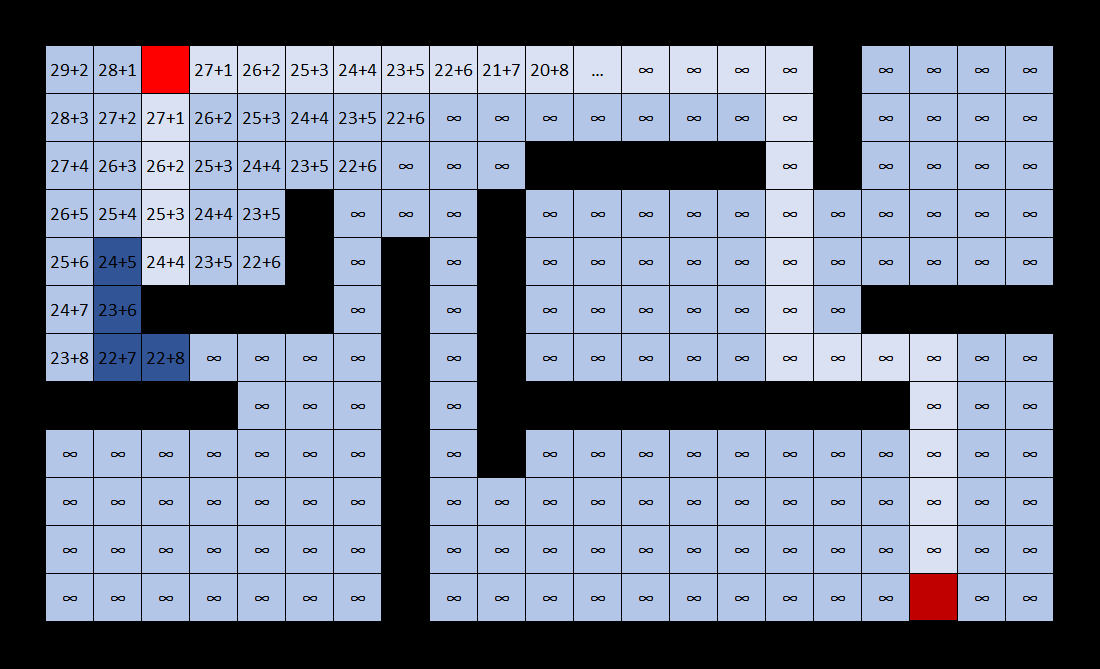

En la anterior imagen utilizamos la métrica de Manhattan como ejemplo, además tenga en cuenta que la distancia Manhattan será una **heurística admisible** porque el agente será movido al menos la cantidad de pasos entre él mismo y su posición final.

In [ ]:
class AStar:
    def __init__(self, MAZE, gph):
        self.MAZE = MAZE
        self.gph = gph
        self.explored = []
        self.f_way = self.explored[::-1]
        self.A_Star_maze()
        self.print_A_Star()

    def print_A_Star(self):
        '''
        This function print the images 
        '''
        for i in range(len(self.explored)):
            track = (self.explored[0:i + 1])
            self.gph.printTrack(track, f"{i}")

    def generate_cost(self, MAZE):
        g_score = {}
        for i in range(len(MAZE)):
            for j in range(len(MAZE)):
                g_score[i, j] = float('inf')
        return g_score

    def distance(self, position, problem, distance_type='E'):
        if distance_type == 'E':
            "The Euclidean distance heuristic for a PositionSearchProblem"
            xy1 = position
            xy2 = problem
            return ((xy1[0] - xy2[0]) ** 2 + (xy1[1] - xy2[1]) ** 2) ** 0.5
        else:
            "The Manhattan distance heuristic for a PositionSearchProblem"
            xy1 = position
            xy2 = problem
            return abs(xy1[0] - xy2[0]) + abs(xy1[1] - xy2[1])

    def A_Star_maze(self):

        START = [0, np.where((self.MAZE[0] == 'c'))[0][0]]
        GOAL = [self.MAZE.shape[0] - 1, np.where((self.MAZE[self.MAZE.shape[0] - 1] == 'c'))[0][0]]
        g_cost_d = self.generate_cost(self.MAZE)
        g_cost_d[tuple(START)] = 0
        h_cost_d = self.generate_cost(self.MAZE)
        h_cost_d[tuple(START)] = self.distance(START, GOAL, 'M')
        queue_a = PriorityQueue()
        queue_a.put((self.distance(START, GOAL, 'M'), self.distance(START, GOAL, 'M'), tuple(START)))
        way = {}
        way_array = []
        while not queue_a.empty():
            position = queue_a.get()[2]
            if position == tuple(GOAL):
                way_array.append(position)
                break
            for next_step in "SEON":
                if next_step == 'S' and (self.MAZE[position[0] + 1][position[1]] != 'w'):
                    last_position = (position[0] + 1, position[1])
                if next_step == 'E' and (self.MAZE[position[0]][position[1] + 1] != 'w'):
                    last_position = (position[0], position[1] + 1)
                if next_step == 'O' and (self.MAZE[position[0]][position[1] - 1] != 'w'):
                    last_position = (position[0], position[1] - 1)
                if next_step == 'N' and (self.MAZE[position[0] - 1][position[1]] != 'w'):
                    last_position = (position[0] - 1, position[1])
                tg_cost_d = g_cost_d[position] + 1
                th_cost_d = tg_cost_d + self.distance(last_position, tuple(GOAL), 'M')
                if position == tuple(GOAL):
                    break
                if th_cost_d < h_cost_d[last_position]:
                    g_cost_d[last_position] = tg_cost_d
                    h_cost_d[last_position] = th_cost_d
                    queue_a.put((th_cost_d, self.distance(last_position, GOAL), last_position, 'M'))
                    way[last_position] = position
                    way_array.append(position)
        way_array_l = []
        for i in (way_array):
            way_array_l.append([i[0], i[1]])

        self.explored = way_array_l

## Greedy Search

Para Greedy Search en a diferencia de $A^*$ tomamos $g(n)=0$, con lo que $f(n)= h(n)$, es el caso de la siguiete imagen se tomó la métrica de Manhattan patra mayor claridad y la implementación fue igual que la de $A^*$ , además tenga en cuenta que la distancia Manhattan será una **heurística admisible** ya que el agente será movido al menos la cantidad de pasos entre él mismo y su posición final.

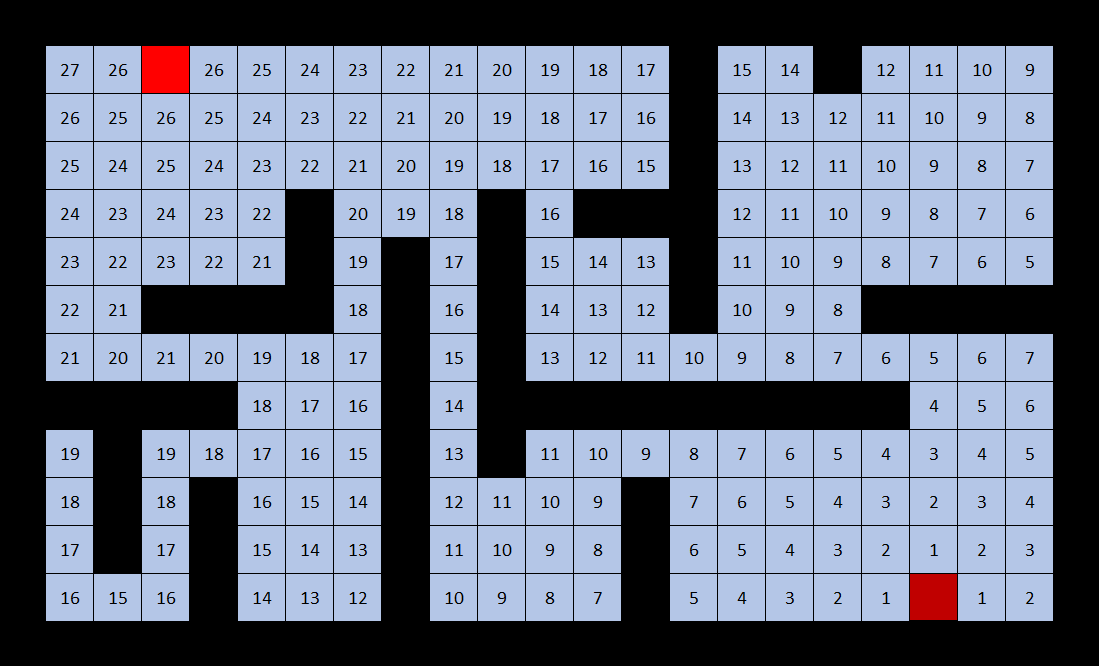

In [ ]:
class GreedySearch:
    def __init__(self, MAZE, gph):
        self.MAZE = MAZE
        self.gph = gph
        self.explored = []
        self.f_way = self.explored[::-1]
        self.Greedy_Search_f()
        self.print_A_Star()

    def print_A_Star(self):
        '''
        This function print the images 
        '''
        for i in range(len(self.explored)):
            track = (self.explored[0:i + 1])
            self.gph.printTrack(track, f"{i}")

    def generate_cost(self, MAZE):
        g_score = {}
        for i in range(len(MAZE)):
            for j in range(len(MAZE)):
                g_score[i, j] = float('inf')
        return g_score

    def distance(self, position, problem, distance_type='E'):
        if distance_type == 'E':
            "The Euclidean distance heuristic for a PositionSearchProblem"
            xy1 = position
            xy2 = problem
            return ((xy1[0] - xy2[0]) ** 2 + (xy1[1] - xy2[1]) ** 2) ** 0.5
        else:
            "The Manhattan distance heuristic for a PositionSearchProblem"
            xy1 = position
            xy2 = problem
            return abs(xy1[0] - xy2[0]) + abs(xy1[1] - xy2[1])

    def Greedy_Search_f(self):

        START = [0, np.where((self.MAZE[0] == 'c'))[0][0]]
        GOAL = [self.MAZE.shape[0] - 1, np.where((self.MAZE[self.MAZE.shape[0] - 1] == 'c'))[0][0]]
        g_cost_d = self.generate_cost(self.MAZE)
        g_cost_d[tuple(START)] = 0
        h_cost_d = self.generate_cost(self.MAZE)
        h_cost_d[tuple(START)] = self.distance(START, GOAL)
        queue_a = PriorityQueue()
        queue_a.put((self.distance(START, GOAL), self.distance(START, GOAL), tuple(START)))
        way = {}
        way_array = []
        while not queue_a.empty():
            position = queue_a.get()[2]
            if position == tuple(GOAL):
                way_array.append(position)
                break
            for next_step in "SEON":
                if next_step == 'S' and (self.MAZE[position[0] + 1][position[1]] != 'w'):
                    last_position = (position[0] + 1, position[1])
                if next_step == 'E' and (self.MAZE[position[0]][position[1] + 1] != 'w'):
                    last_position = (position[0], position[1] + 1)
                if next_step == 'O' and (self.MAZE[position[0]][position[1] - 1] != 'w'):
                    last_position = (position[0], position[1] - 1)
                if next_step == 'N' and (self.MAZE[position[0] - 1][position[1]] != 'w'):
                    last_position = (position[0] - 1, position[1])
                tg_cost_d = 0
                th_cost_d = tg_cost_d + self.distance(last_position, tuple(GOAL))
                if position == tuple(GOAL):
                    break
                if th_cost_d < h_cost_d[last_position]:
                    g_cost_d[last_position] = tg_cost_d
                    h_cost_d[last_position] = th_cost_d
                    queue_a.put((th_cost_d, self.distance(last_position, GOAL), last_position))
                    way[last_position] = position
                    way_array.append(position)
        way_array_l = []
        for i in (way_array):
            way_array_l.append([i[0], i[1]])

        self.explored = way_array_l

# Main Function

In [ ]:
if __name__ == '__main__':
    app = QApplication(sys.argv)
    windows = MainWindows()
    windows.show()
    sys.exit(app.exec())